In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#读取数据，处理数据
data = pd.read_csv("D:\桌面\Train.csv")
#把shares大于10000的都删除.占比<5%
rows_to_drop = data[data[' shares'] > 10000].index
df = data.drop(rows_to_drop)

In [3]:
# 将训练数据和测试数据分开
X = df.iloc[:, :-1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = df.iloc[:, -1]

In [4]:
# 卡方检验特征选择和PCA特征提取
result=[]
for i in range(1,41):
    skb = SelectKBest(chi2, k=i)
    X_pca = skb.fit_transform(X_scaled, y)
    # 训练模型并进行十折交叉验证
    n_splits = 10
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    mae_list = []
    rmse_list = []
    mape_list = []
    for train_index, test_index in kf.split(X_pca):
        X_train, X_test = X_pca[train_index], X_pca[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #把y值分为两类来进行预测
        y_binary = np.where(y_train > 1500,1,0)
        lr_model = LogisticRegression(max_iter=200)
        lr_model.fit(X_train, y_binary)
        #把预测值映射回去
        y_pred = lr_model.predict(X_test)
        print(y_pred.mean())
        y_pred= np.where(y_pred > 0, 100*12, 100*9)
        mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
    result.append(np.mean(mape_list))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.6119177253478524
0.5977011494252874
0.5972768532526475
0.6024205748865356
0.6114977307110439
0.6063540090771559
0.6124054462934947
0.6187594553706506
0.6051437216338881
0.6024205748865356
0.08439201451905626
0.07320024198427103
0.08623298033282904
0.07715582450832073
0.08260211800302572
0.0735249621785174
0.07170953101361574
0.08350983358547655
0.08411497730711044
0.07866868381240545
0.10859044162129462
0.09770114942528736
0.10983358547655069
0.10257186081694403
0.10015128593040847
0.09500756429652042
0.09319213313161875
0.10711043872919819
0.10771558245083207
0.09773071104387292
0.15789473684210525
0.15063520871143377
0.1636913767019667
0.15703479576399396
0.14069591527987896
0.14341906202723148
0.14614220877458398
0.156732223903177
0.15431164901664146
0.14856278366111952
0.3163944343617665
0.31699939503932245
0.3255673222390318
0.3267776096822995
0.30620272314674735
0.31164901664145234
0.32042360060514374
0.32829046898638425
0.312556732223903

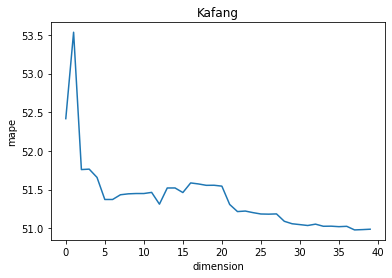

In [5]:
plt.ylabel("mape")
plt.xlabel("dimension")
plt.title("Kafang")
plt.plot(range(len(result)),result);

In [6]:
min(result)

50.979430001604484

In [7]:
# 卡方检验特征选择和PCA特征提取
resul=[]
for i in range(1,41):
    print(i)
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_scaled)
    X_pca = scaler.fit_transform(X_pca)
    # 训练模型并进行十折交叉验证
    n_splits = 10
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    mae_list = []
    rmse_list = []
    mape_list = []
    for train_index, test_index in kf.split(X_pca):
        X_train, X_test = X_pca[train_index], X_pca[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #把y值分为两类来进行预测
        y_binary = np.where(y_train > 1500,1,0)
        lr_model = LogisticRegression(max_iter=200)
        lr_model.fit(X_train, y_binary)
        #把预测值映射回去
        y_pred = lr_model.predict(X_test)
        y_pred= np.where(y_pred > 0, 100*12, 100*9)
        mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
    resul.append(np.mean(mape_list))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


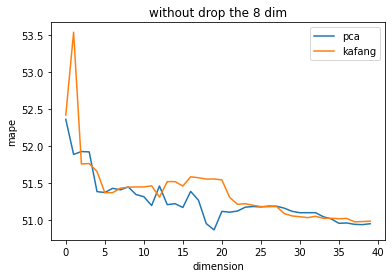

In [14]:
plt.plot(range(len(resul)),resul,label="pca")
plt.plot(range(len(result)),result,label='kafang')
plt.legend()
plt.title("without drop the 8 dim")
plt.ylabel("mape")
plt.xlabel("dimension");

In [10]:
# 找到最小MAPE值对应的索引
min_index = np.argmin(resul)
print(resul[min_index])
min_index

50.87069265474512


19

In [18]:
resul[17]

51.27012883967185

In [25]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_scaled)
X_pca = scaler.fit_transform(X_pca)
# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #把y值分为两类来进行预测
    y_binary = np.where(y_train > 1500,1,0)
    lr_model = LogisticRegression(max_iter=200)
    lr_model.fit(X_train, y_binary)
    #把预测值映射回去
    y_pred = lr_model.predict(X_test)
    y_pred= np.where(y_pred > 0, 100*12, 100*9)
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
np.mean(mape_list)

51.22467732856096

In [20]:
i

40